In [9]:
!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.15

  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
ERROR: tensorflow-gpu 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: tensorflow-gpu 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


  Using cached https://files.pythonhosted.org/packages/1e/e9/d3d747a97f7188f48aa5eda486907f3b345cd409f0a0850468ba867db246/tensorboard-1.15.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/de/62/2ee9cd74c9fa2fa450877847ba560b260f5d0fb70ee0595203082dafcc9d/tensorflow_estimator-1.15.1-py2.py3-none-any.whl
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0


In [ ]:
!pip install keras==2.3.1


     |████████████████████████████████| 378kB 7.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 9.5MB/s 


In [ ]:
import re
from collections import Counter
from keras.models import load_model
from nltk.tokenize import word_tokenize
from nltk import ngrams,word_tokenize
import numpy as np
import re
from unidecode import unidecode
import string
from tqdm import tqdm
from random import shuffle
from datetime import datetime
import os
import time


Using TensorFlow backend.


In [ ]:
# BASIC INSTALL 
# KEY: 4/2gFyJvqhPILwIRMw0tT1EIh97zJx4LqRiUE8rhhQ3kDp8_Auvq-AlWA
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 
from google.colab import drive
drive.mount('/content/drive')

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········

In [ ]:
%cd /content/drive/My\ Drive/Colab 


/content/drive/My Drive/Colab


In [ ]:
%cd Spell-Checker-master/


/content/drive/My Drive/Colab/Spell-Checker-master


In [8]:
!ls

ls: cannot open directory '.': Input/output error


In [ ]:

# load the data by pkl file
import pickle
data = pickle.load(open('./Data/VNTC_data.pkl', 'rb'))
print(len(data),len(set(i for i in data)))


261 259


In [ ]:
data[10]

'Đình, đền, chùa, miếu, mạo'

In [ ]:
alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'
training_data = []
for i in data:
  i=i.replace("\n",".")
  sentences=i.split(".")
  for j in sentences:
      if len(j.split()) > 2 and re.match(alphabet, j.lower()):
          training_data.append(j)
print(len(training_data))

NameError: ignored

In [ ]:
# del data


In [ ]:
print(training_data[:10])

['Tòa cao ốc, chung cư, trung tâm thị xã, thị trấn', 'Tòa nhà, chung cư', 'Xã, thị xã, thị trấn', 'Khu tham quan ngắm cảnh', 'Tòa thánh, nhà thờ, tu viện', 'Nghĩa trang, đài tưởng niệm liệt sỹ', 'Tượng đài, đài tưởng niệm, bia tưởng niệm', 'Rừng quốc gia, vườn quốc gia, khu bảo tồn', 'Đình, đền, chùa, miếu, mạo', 'Sông, hồ, khu du lịch']


In [ ]:
!pip install unidecode # this module removes tones


In [ ]:
import re
import numpy as np
from unidecode import unidecode
# some common Vietnamese spell mistake
letters = list("abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
letters2 = list("abcdefghijklmnopqrstuvwxyz")

typo={"ă":"aw","â":"aa","á":"as","à":"af","ả":"ar","ã":"ax","ạ":"aj","ắ":"aws","ổ":"oor","ỗ":"oox","ộ":"ooj","ơ":"ow",
"ằ":"awf","ẳ":"awr","ẵ":"awx","ặ":"awj","ó":"os","ò":"of","ỏ":"or","õ":"ox","ọ":"oj","ô":"oo","ố":"oos","ồ":"oof",
"ớ":"ows","ờ":"owf","ở":"owr","ỡ":"owx","ợ":"owj","é":"es","è":"ef","ẻ":"er","ẽ":"ex","ẹ":"ej","ê":"ee","ế":"ees","ề":"eef",
"ể":"eer","ễ":"eex","ệ":"eej","ú":"us","ù":"uf","ủ":"ur","ũ":"ux","ụ":"uj","ư":"uw","ứ":"uws","ừ":"uwf","ử":"uwr","ữ":"uwx",
"ự":"uwj","í":"is","ì":"if","ỉ":"ir","ị":"ij","ĩ":"ix","ý":"ys","ỳ":"yf","ỷ":"yr","ỵ":"yj","đ":"dd",
"Ă":"Aw","Â":"Aa","Á":"As","À":"Af","Ả":"Ar","Ã":"Ax","Ạ":"Aj","Ắ":"Aws","Ổ":"Oor","Ỗ":"Oox","Ộ":"Ooj","Ơ":"Ow",
"Ằ":"AWF","Ẳ":"Awr","Ẵ":"Awx","Ặ":"Awj","Ó":"Os","Ò":"Of","Ỏ":"Or","Õ":"Ox","Ọ":"Oj","Ô":"Oo","Ố":"Oos","Ồ":"Oof",
"Ớ":"Ows","Ờ":"Owf","Ở":"Owr","Ỡ":"Owx","Ợ":"Owj","É":"Es","È":"Ef","Ẻ":"Er","Ẽ":"Ex","Ẹ":"Ej","Ê":"Ee","Ế":"Ees","Ề":"Eef",
"Ể":"Eer","Ễ":"Eex","Ệ":"Eej","Ú":"Us","Ù":"Uf","Ủ":"Ur","Ũ":"Ux","Ụ":"Uj","Ư":"Uw","Ứ":"Uws","Ừ":"Uwf","Ử":"Uwr","Ữ":"Uwx",
"Ự":"Uwj","Í":"Is","Ì":"If","Ỉ":"Ir","Ị":"Ij","Ĩ":"Ix","Ý":"Ys","Ỳ":"Yf","Ỷ":"Yr","Ỵ":"Yj","Đ":"Dd"}

region={"ẻ":"ẽ","ẽ":"ẻ","ũ":"ủ","ủ":"ũ","ã":"ả","ả":"ã","ỏ":"õ","õ":"ỏ","i":"j"}
region2={"s":"x","l":"n","n":"l","x":"s","d":"gi","S":"X","L":"N","N":"L","X":"S","Gi":"D","D":"Gi"}

vowel=list("aeiouyáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵ")
acronym={"không":"ko"," anh":" a","em":"e","biết":"bít","giờ":"h","gì":"j","muốn":"mún","học":"hok","yêu":"iu",
         "chồng":"ck","vợ":"vk"," ông":" ô","được":"đc","tôi":"t",
         "Không":"Ko"," Anh":" A","Em":"E","Biết":"Bít","Giờ":"H","Gì":"J","Muốn":"Mún","Học":"Hok","Yêu":"Iu",
         "Chồng":"Ck","Vợ":"Vk"," Ông":" Ô","Được":"Đc","Tôi":"T",}

teen={"ch":"ck","ph":"f","th":"tk","nh":"nk",
      "Ch":"Ck","Ph":"F","Th":"Tk","Nh":"Nk", "Tr": "Ch","Tr":"Ch", "tr":"ch"}

In [ ]:
# function for adding mistake( noise)
def teen_code(sentence,pivot):
    random = np.random.uniform(0,1,1)[0]
    new_sentence=str(sentence)
    if random>pivot:
        for word in acronym.keys():
            if re.search(word, new_sentence):
                random2 = np.random.uniform(0,1,1)[0]
                if random2 <0.5:
                    new_sentence=new_sentence.replace(word,acronym[word])
        for word in teen.keys(): 
            if re.search(word, new_sentence):
                random3 = np.random.uniform(0,1,1)[0]
                if random3 <0.05:
                    new_sentence=new_sentence.replace(word,teen[word])        
        return new_sentence
    else:
        return sentence
    

def add_noise(sentence, pivot1, pivot2):
    sentence = teen_code(sentence,0.4)
    noisy_sentence = ""
    i = 0
    while i < len(sentence):
        if sentence[i] not in letters:
            noisy_sentence+=sentence[i]
        else: 
            random = np.random.uniform(0,1,1)[0]   
            if random < pivot1:
                noisy_sentence+=(sentence[i])
            elif random<pivot2:
                if sentence[i] in typo.keys() and sentence[i] in region.keys():
                    random2=np.random.uniform(0,1,1)[0]
                    if random2<=0.4:
                        noisy_sentence+=typo[sentence[i]]
                    elif random2<0.8:
                        noisy_sentence+=region[sentence[i]]
                    elif random2<0.95 :
                        noisy_sentence+=unidecode(sentence[i])
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in typo.keys():
                    random3=np.random.uniform(0,1,1)[0]
                    if random3<=0.6:
                        noisy_sentence+=typo[sentence[i]]
                    elif random3<0.9 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in region.keys():
                    random4=np.random.uniform(0,1,1)[0]
                    if random4<=0.6:
                        noisy_sentence+=region[sentence[i]]
                    elif random4<0.85 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif i<len(sentence)-1 :
                    if sentence[i] in region2.keys() and (i==0 or sentence[i-1] not in letters) and sentence[i+1] in vowel:
                        random5=np.random.uniform(0,1,1)[0]
                        if random5<=0.9:
                            noisy_sentence+=region2[sentence[i]]
                        else:
                            noisy_sentence+=sentence[i]
                    else:
                        noisy_sentence+=sentence[i]

            else:
                new_random = np.random.uniform(0,1,1)[0]
                if new_random <=0.33:
                    if i == (len(sentence) - 1):
                        continue
                    else:
                        noisy_sentence+=(sentence[i+1])
                        noisy_sentence+=(sentence[i])
                        i += 1
                elif new_random <= 0.66:
                    random_letter = np.random.choice(letters2, 1)[0]
                    noisy_sentence+=random_letter
                else:
                    pass
      
        i += 1
    return noisy_sentence

In [ ]:
def extract_phrases(text):
    return re.findall(r'\w[\w ]+', text)

In [ ]:
import itertools
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in training_data)
phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
print(phrases[-10:])

0
[]


In [ ]:
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

# divide document into 5-grams 
# a single Vietnamese word cant contain more than 7 characters ( nghiêng )
MAXNGRAM = 4
MAXLEN = 40
def gen_ngrams(words, n=2):
    return ngrams(words.split(), n)
   
list_ngrams = []
for p in tqdm(phrases):
  if not re.match(alphabet, p.lower()):
    continue
  for NGRAM in range(2,MAXNGRAM + 1):
    for ngr in gen_ngrams(p, NGRAM):
      if len(" ".join(ngr)) < MAXLEN:
        list_ngrams.append(" ".join(ngr))


NameError: ignored

In [ ]:
# del phrases
list_ngrams = list((list_ngrams))
print(len(list_ngrams))

724


In [ ]:
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
print(alphabet)
print(len(alphabet))


['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
1

In [ ]:

# So a 5-grams contain at most 7*5 = 35 character (except one that has spell mistake)
# add "\x00" padding at the end of 5-grams in order to equal their length

MAXLEN = 40

def encoder_data(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x
      
def decoder_data(x):
    x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)


In [ ]:
# Build the neural network
# this is adapted from the seq2seq architecture, which can be used for Machine Translation, Text Summarization Image Captioning ...
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense,LSTM, Bidirectional
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
encoder = LSTM(256, input_shape=(MAXLEN, len(alphabet)), return_sequences=True)


In [ ]:
decoder = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3))

In [ ]:
# model = load_model("./model/spell.h5")
# model._make_predict_function()
model=Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 256)           466944    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 512)           1050624   
_________________________________________________________________
time_distributed_3 (TimeDist (None, 40, 256)           131328    
_________________________________________________________________
activation_3 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 40, 199)           51143     
_________________________________________________________________
activation_4 (Activation)    (None, 40, 199)           0         
Total params: 1,700,039
Trainable params: 1,700,039
Non-trainable params: 0
____________________________________________

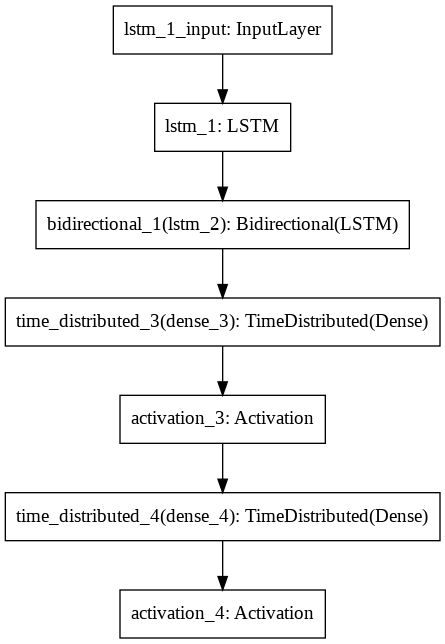

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')


In [ ]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=42)

In [ ]:
train_data = ["Đà Nẵng"]
valid_data = ["Đà Nẵng"]

In [ ]:
def generate_data(data, batch_size):
  cur_index = 0
  while True:
      x, y = [], []
      for i in range(batch_size):  
          y.append(encoder_data(data[cur_index]))
          x.append(encoder_data(add_noise(data[cur_index],0.94,0.985)))
          cur_index += 1
          if cur_index > len(data)-1:
              cur_index = 0
      yield np.array(x), np.array(y)

# ============ CODE OK ==============
# def generate_data_non_encode(data, batch_size):
#     x, y = [], []
#     cur_index = 0 
#     while cur_index != batch_size:
#           noise_text = add_noise(data[0],0.94,0.986)
#           if (noise_text not in x) and (noise_text != data[0]):
#                 y.append(data[0])
#                 x.append(noise_text)
#                 cur_index += 1
#     return list(zip(x, y))


# def generate_data_encode(data, batch_size):
#       cur_index = 0
#       while True:
#           x, y = [], []
#           for i in range(batch_size):  
#               y.append(encoder_data(data[cur_index][1]))
#               x.append(encoder_data(data[cur_index][0]))
#               cur_index += 1
#               if cur_index > len(data)-1:
#                   cur_index = 0
#           yield np.array(x), np.array(y)
#===================================

def generate_data_non_encode(data, batch_size):
    x_non_decode, y_non_decode = [], []
    for cur_index in range(0, len(data)):
      batch_size_noise = 0
      while batch_size_noise != batch_size:
            noise_text = add_noise(data[cur_index],0.94,0.986)
            if (noise_text not in x_non_decode) and (noise_text != data[cur_index]):
                  y_non_decode.append(data[cur_index])
                  x_non_decode.append(noise_text)
                  batch_size_noise += 1
    return list(zip(x_non_decode, y_non_decode))

def generate_data_encode(data, batch_size):
      cur_index = 0
      while True:
          x, y = [], []
          for i in range(batch_size):  
              y.append(encoder_data(data[cur_index][1]))
              x.append(encoder_data(data[cur_index][0]))
              cur_index += 1
              if cur_index > len(data)-1:
                  cur_index = 0
          yield np.array(x), np.array(y)    

In [ ]:
import random
BATCH_TRAIN_SIZE = 512
BATCH_VALID_SIZE = 256
# ["Đà Nẵng", "Sơn Trà", "bệnh viện", "Hoàng Diệu", "Nguyễn Văn Linh", "Nhà Hàng", "Nguyễn Thái Học", "Khách sạn", "Ngũ Hành Sơn", "Đà Lạt", "Phạm Công Trứ", "Cửa hàng", "Hiệu thuốc"
# "Bưu điện", "Tạp hóa", "Trần Đình Đàn", "Trần Thanh Mại", "Phan Thúc Duyện", "Nhà may", "Cây xăng"]


train_data = ["Đà Nẵng", "Sơn Trà", "bệnh viện", "Hoàng Diệu", "Nguyễn Văn Linh", "Nhà Hàng", "Nguyễn Thái Học", "Khách sạn", "Ngũ Hành Sơn"]
valid_data = train_data
# ==================== OK ===========
train_non_encode = generate_data_non_encode(train_data, batch_size = BATCH_TRAIN_SIZE)
validation_non_encode = generate_data_non_encode(valid_data, batch_size = BATCH_VALID_SIZE)
random.shuffle(train_non_encode)
random.shuffle(validation_non_encode)
train_generator = generate_data_encode(train_non_encode, batch_size = BATCH_TRAIN_SIZE)
validation_generator = generate_data_encode(validation_non_encode, batch_size = BATCH_VALID_SIZE)
# ===================================


# ==============================
# train_generator = generate_data_noisy(train_data, batch_size=BATCH_SIZE)

# train_generator = generate_data(train_data, batch_size=BATCH_TRAIN_SIZE)
# validation_generator = generate_data(valid_data, batch_size=BATCH_VALID_SIZE)

In [ ]:
random.shuffle(train_non_encode,random.random)

In [ ]:
print(train_non_encode)


[('Hoàng Djeu', 'Hoàng Diệu'), ('bệnh vihn', 'bệnh viện'), ('nguyễn Tkái Học', 'Nguyễn Thái Học'), ('Ngubễn Văn Link', 'Nguyễn Văn Linh'), ('Nhà làn', 'Nhà Hàng'), ('Ngũ àHnh Xơn', 'Ngũ Hành Sơn'), ('Nguyen Tháj Học', 'Nguyễn Thái Học'), ('Đà Nang', 'Đà Nẵng'), ('Đaf Nẵeg', 'Đà Nẵng'), ('Đà Nẵog', 'Đà Nẵng'), ('Nhà Hafpg', 'Nhà Hàng'), ('Khach san', 'Khách sạn'), ('Sowu Trà', 'Sơn Trà'), ('Nhà càng', 'Nhà Hàng'), ('Hoàng nệu', 'Hoàng Diệu'), ('bệnx việ', 'bệnh viện'), ('Hoàn gDiệ', 'Hoàng Diệu'), ('Nguyễn thái Hok', 'Nguyễn Thái Học'), ('Hoang Giieu', 'Hoàng Diệu'), ('Khách sạc', 'Khách sạn'), ('bệnh vden', 'bệnh viện'), ('sách sạn', 'Khách sạn'), ('Kpách sạ', 'Khách sạn'), ('Nhà Hkng', 'Nhà Hàng'), ('Nguyễn Thasa Hok', 'Nguyễn Thái Học'), ('Nhà Hdng', 'Nhà Hàng'), ('Ngũ àhn Sơn', 'Ngũ Hành Sơn'), ('Nguyễn khái Học', 'Nguyễn Thái Học'), ('Khsch ạn', 'Khách sạn'), ('Ngũ rành Sơn', 'Ngũ Hành Sơn'), ('Hoyng Diệu', 'Hoàng Diệu'), ('Ngulễn Văn Linh', 'Nguyễn Văn Linh'), ('iháh sạn', 'Khách 

In [ ]:
len(train_data)//BATCH_TRAIN_SIZE

0

In [ ]:
# model.fit_generator(train_generator, steps_per_epoch=len(train_data)//BATCH_SIZE, epochs=50,
#                     validation_data=validation_generator, validation_steps=len(valid_data)//BATCH_SIZE,
#                     callbacks=[checkpointer])

now = datetime.now()
current_time = now.strftime("%H:%M:%S_%d%m%y")
# OVERFITTING 
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.993, mode='max', 
                   verbose = 1, patience = 20)

checkpointer = ModelCheckpoint(filepath=os.path.join('./model/spell_{}.h5'.format(current_time)),save_best_only=True, verbose=1)
# model.fit_generator(train_generator, steps_per_epoch= len(train_data), epochs=20,
#                     validation_data=validation_generator, validation_steps = len(valid_data),callbacks=[checkpointer])

# ========================
# model spell.h5 + ["Đà Nẵng", " Srứaơn Trà"]: spell_09:04:45_060820.h5
# model spell.h5 + ["Đà Nẵng", "Sơn Trà", "Bệnh Viện"]: spell_07:55:18_070820.h5
# model spell.h5 + 19 loại dữ liệu: spell_09:16:05_070820.h5
# model = load_model("./model/spell.h5")
start_time = time.time()
seqModel = model.fit_generator(train_generator, steps_per_epoch=len(train_non_encode)//256, epochs=20,
                    validation_data=validation_generator, validation_steps=len(validation_non_encode)//256, callbacks=[checkpointer, es])
print("--- %s seconds ---" % (time.time() - start_time))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
18/18 [==============================] - 7s 381ms/step - loss: 2.4904 - accuracy: 0.5780 - val_loss: 1.3192 - val_accuracy: 0.7444

Epoch 00001: val_loss improved from inf to 1.31920, saving model to ./model/spell_07:03:42_100820.h5
Epoch 2/20
18/18 [==============================] - 4s 222ms/step - loss: 1.1177 - accuracy: 0.7379 - val_loss: 0.9839 - val_accuracy: 0.7236

Epoch 00002: val_loss improved from 1.31920 to 0.98391, saving model to ./model/spell_07:03:42_100820.h5
Epoch 3/20
18/18 [==============================] - 4s 225ms/step - loss: 0.9490 - accuracy: 0.7444 - val_loss: 0.9276 - val_accuracy: 0.7487

Epoch 00003: val_loss improved from 0.98391 to 0.92755, saving model to ./model/spell_07:03:42_100820.h5
Epoch 4/20
18/18 [==============================] - 4s 226ms/step - loss: 0.9066 - accuracy: 0.7475 - val_loss: 0.8934 - val_accuracy: 0.7732

Epoch 00004: val_loss 

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


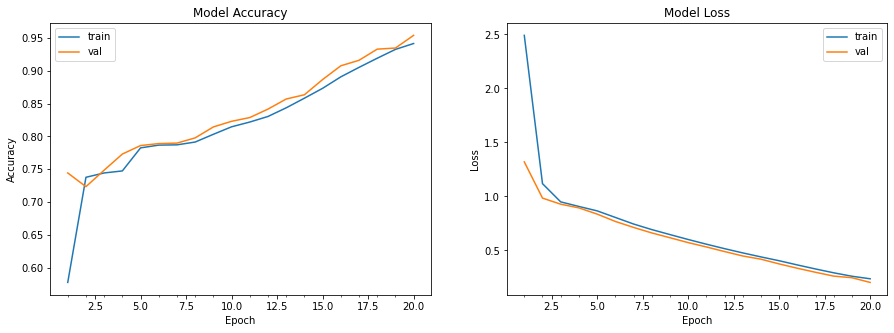

In [ ]:
plot_model_history(seqModel)


In [ ]:
BATCH_TEST_SIZE = 512
test_non_encode = generate_data_non_encode(["NGuyễn Văn Linh"], batch_size = BATCH_TRAIN_SIZE)
test_generator = generate_data_encode(test_non_encode, batch_size = BATCH_TRAIN_SIZE)


In [ ]:
eval_model = load_model('./model/spell_07:55:18_070820.h5')
eval_model.evaluate_generator(test_generator,steps=1,verbose=1)


1/1 [==============================] - 1s 1s/step


[0.45884695649147034, 0.904589831829071]

In [ ]:
eval_model = load_model('./model/spell_09:04:45_060820.h5')
eval_model.evaluate_generator(test_generator,steps=1,verbose=1)


1/1 [==============================] - 2s 2s/step


[0.04761025309562683, 0.9862060546875]

In [ ]:
model = load_model("./model/spell_09:04:45_060820.h5")
model._make_predict_function()
0.00062

0.00062

In [ ]:
preds = model.predict(np.array([encoder_data("Nhà Hàng")]), verbose=0)
print(decoder_data(preds[0]).strip('\x00'))

Nhà Hàng


In [ ]:
NGRAM=4
MAXLEN=40
MAXNGRAM = 4
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
letters=list("abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
accepted_char=list((string.digits + ''.join(letters)))

def extract_phrases(text):
    pattern = r'\w[\w ]*|\s\W+|\W+'
    return re.findall(pattern, text)

def encoder_data(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x
      
def decoder_data(x):
    x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)


def nltk_ngrams(words, n=5):
    return ngrams(words.split(), n)
      
def guess(ngram):
    text = ' '.join(ngram)
    preds = model.predict(np.array([encoder_data(text)]), verbose=0)
    return decoder_data(preds[0]).strip('\x00')

def correct(sentence):
    for i in sentence:
        if i not in accepted_char:
            sentence=sentence.replace(i," ")
    output = []
    for NGRAM in range(2, MAXNGRAM + 1):
        ngrams = list(nltk_ngrams(sentence, n=NGRAM))
        guessed_ngrams = list(guess(ngram) for ngram in ngrams)
        candidates = [Counter() for _ in range(len(guessed_ngrams) + NGRAM - 1)]
        for nid, ngram in (enumerate(guessed_ngrams)):
            for wid, word in (enumerate(re.split(' +', ngram))):
                candidates[nid + wid].update([word])        
        try:
          output.append(' '.join(c.most_common(1)[0][0] for c in candidates))
        except:
          output.append(sentence)
    return output


In [ ]:
correct("Hoanh Diệu")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: generator 'ngrams' raised StopIteration


['Hoàng Diệu', 'Hoang Diệu', 'Hoang Diệu']